# Настройка pandas

In [135]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

### Схема: разделание, применение, объединение

![](pic/pandas01.png)

Разделение выполняется с помощью метода `.groupby()` объекта `Series` или `DataFrame`.

После разделения данных для каждой группы можно выполнить:

- **агрегацию**: вычислить итоговую статистику
- **преобразование**: выполнить вычисление по группам
- **фильтацию**: удаление групп данных.

Объединие происходит автоматически.

Оригинальная статья о методе:
https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf

### Данные для примеров

In [136]:
# загружаем данные датчиков
sensor_data = pd.read_csv("Data/sensors.csv")
sensor_data[:5]
# показания по осям X, Y, Z, снятые 
# с акселерометра и датчика ориентации

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [137]:
sensor_data.sample(5)

,interval,sensor,axis,reading
7,2,accel,Y,0.3
15,1,orientation,Z,0.0
17,1,orientation,X,0.1
12,0,orientation,Z,0.0
21,3,orientation,Z,0.0


## Разделение данных

Сначала рассмотрим группировку на основе столбцов, затем разберем свойства группировки.

### Группировка по значениям отдельного столбца

In [138]:
# группировка этих данных по столбцу/переменной sensor
# возвращает объект DataFrameGroupBy
grouped_by_sensor = sensor_data.groupby('sensor') # sort=True
grouped_by_sensor

Получили промежуточное описание группировки, помогает выявить ошибки перед выполнением и имеет ряд свойств.

In [139]:
# получаем информацию о количестве групп, 
# которые будут созданы
grouped_by_sensor.ngroups

2

In [140]:
# что представляют из себя найденные группы?
grouped_by_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
             23],
            dtype='int64')}

### Просмотр результатов группировки

In [141]:
# вспомогательная функция, печатающая содержимое групп
def print_groups(group_object):
    # итерируем по всем группам, печатая название группы 
    # и первые пять наблюдений в группе
    for name, group in group_object:
        print(name)
        print(group[:5])

In [142]:
# смотрим содержимое созданных групп
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [143]:
# получаем информацию о количестве элементов
# в каждой группе
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [144]:
# получаем информацию о количестве элементов
# в каждом столбце каждой группы
grouped_by_sensor.count()

,interval,axis,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [145]:
# получаем данные конкретной группы
grouped_by_sensor.get_group('accel')[:5]

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [146]:
# извлекаем первые три строки в каждой группе
grouped_by_sensor.head(3)

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0


In [147]:
# извлекаем вторую строку каждой группы
grouped_by_sensor.nth(1)

,interval,axis,reading
sensor,,,
accel,0,Y,0.5
orientation,0,Y,0.1


In [148]:
# получаем описательные статистики по каждой группе
grouped_by_sensor.describe()

interval                      ... reading  \
               count mean       std  min  ...     25%   
sensor                                    ...           
accel           12.0  1.5  1.167748  0.0  ...     0.2   
orientation     12.0  1.5  1.167748  0.0  ...     0.0   

                               
              50%    75%  max  
sensor                         
accel        0.35  0.725  1.0  
orientation  0.10  0.225  0.4  

[2 rows x 16 columns]

### Группировка по нескольким столбцам

In [149]:
# группируем по значениям столбцов sensor и axis
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

### Группировка по уровням индекса

Изменим форму данных, создав иерархический индекс, у которого уровнями будут столбцы sensor и axis:

In [150]:
# создаем копию данных и заново индексируем ее
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [151]:
# группируем по первому уровню индекса (типу датчика)
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [152]:
# группируем по нескольким уровням индекса
print_groups(mi.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

### Применение агрегирующих функций к группам

Агрегирующие функции можно примеить к каждой группе с помощью метода `.agg()` объекта `GroupBy`. Параметр - ссылка на функцию, которая будет применяться к каждой группе. 
В случае `DataFrame` эта функция будет применяться к каждому столбцу.

In [153]:
# вычисляем среднее значение для каждого типа датчика сенсора/оси
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [154]:
# вместо индекса, совпадающего с индексом исходного объекта,
# создаем числовой индекс и переносим уровни исходного
# индекса в столбцы
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

,sensor,axis,interval,reading
0,accel,X,1.5,0.85
1,accel,Y,1.5,0.35
2,accel,Z,1.5,0.15
3,orientation,X,1.5,0.15
4,orientation,Y,1.5,0.25
5,orientation,Z,1.5,0.00


In [155]:
# можно просто применить агрегирующую функцию к группе
sensor_axis_grouping.mean()

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

`Список всех доступных агрегирующих функций`:
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats

Официальная документация по `group by`: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [156]:
# применяем сразу несколько агрегирующих функций
sensor_axis_grouping.agg([np.sum, np.std])

interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [157]:
# применяем к каждому столбцу свою функцию
sensor_axis_grouping.agg({'interval' : len,
                          'reading': np.mean})

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [158]:
# вычисляем среднее только для столбца reading
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

### Преобразование групп данных

Метод .transform() объекта GroupBy применяет функцию к каждому значению объекта DataFrame и возвращает другой объект DataFrame.

In [159]:
# создаем объект DataFrame, который
# будем использовать в примерах
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz', 
                                          'fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [160]:
# сгруппируем данные по столбцу Label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [161]:
# добавляем 10 ко всем значениям во всех столбцах
grouped_by_label.transform(lambda x: x + 10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


Столбцы, которые имеют строковые значения, исключены из результата.

### Заполнение пропущенных значений групповым средним

Часто необходимо заменить пропущенные данные в каждой группе групповым средним (на основе непропущенных значений). 

In [162]:
# создаем данные, чтобы продемонстрировать способ
# замены пропусков
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})
df

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


In [163]:
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [164]:
# вычисляем среднее для каждой группы
grouped.mean()

,Values
Label,
A,11.0
B,21.0


In [165]:
# используем метод .transform(), чтобы заполнить
# значения NaN групповым средним
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


### Вычисление нормализованных z-значений с помощью преобразований

In [166]:
# генерируем временной ряд со скользящими средними
np.random.seed(123456)

Случный набор значений нормального распределения со средним значением 0,5 и стандартным отклонением 2:

In [167]:
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 pd.date_range('2013-01-01', periods=365*3))

Данные индексируются по дням, и на основе 100-дневного окна вычисляется скользящее среднее для кадого значения:

In [168]:
periods = 100
rolling = data.rolling(
    window=periods,
    min_periods=periods,
    center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

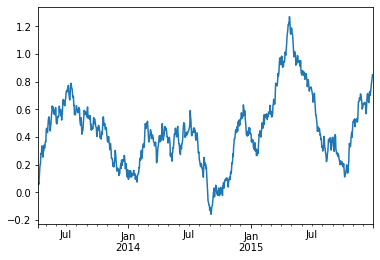

In [169]:
# визуализируем ряд
rolling.plot();

In [170]:
# вычисляем среднее и стандартное отклонение
# по каждому году
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


In [171]:
# выполняем z-преобразование
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,-3.172066e-17,1.0
2014,-1.881296e-15,1.0
2015,-1.492261e-15,1.0


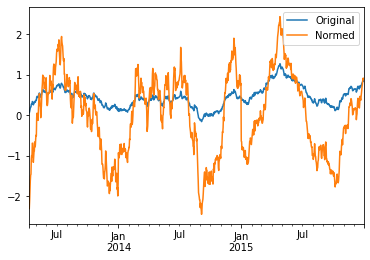

In [172]:
# визуализируем исходные и
# стандартизированные данные
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();

### Исключение групп из процедуры агрегирования

С помощью метода `.filter()` можно выборочно удалить группы данных из обработки. В этот метод передают функцию, с помощью которой по каждой группе можно принять решение о включении данной группы в итоговый результат. 

In [173]:
# создаем данные для наших примеров
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [174]:
# удаляем группы с одним непропущенным значением и меньше
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [175]:
# удаляем группы, в которых есть пропуски
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


In [176]:
# отбираем группы со средним 2.0 и выше 
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0
